# EDA Demographics Dataset 

Dieses Notebook führt eine explorative Datenanalyse des Demographics-Datensatzes durch, welcher Geschlechts und Altersverteilungen in Flüchtlingspopulationen enthält.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 120)
pd.set_option("display.width", 160)


demo = pd.read_csv("../archive/demographics.csv")


print("Shape:", demo.shape)
demo.head(3)


Shape: (18356, 19)


,Year,Country / territory of asylum/residence,Location Name,Female 0-4,Female 5-11,Female 5-17,Female 12-17,Female 18-59,Female 60+,F: Unknown,F: Total,Male 0-4,Male 5-11,Male 5-17,Male 12-17,Male 18-59,Male 60+,M: Unknown,M: Total
0,2001,Afghanistan,Kabul,0,NaN,1.0,NaN,1,0,0.0,2,0,NaN,0.0,NaN,2,0,0.0,2
1,2001,Afghanistan,Various,14335,NaN,45451.0,NaN,99880,19234,412004.0,590904,14716,NaN,47522.0,NaN,114965,13025,435492.0,625720
2,2001,Afghanistan,Herat,0,NaN,0.0,NaN,1,0,0.0,1,0,NaN,0.0,NaN,1,0,0.0,1


## 2 Überblick über fehlende Werte und Spalten

Spaltennamen:
['Year', 'Country / territory of asylum/residence', 'Location Name', 'Female 0-4', 'Female 5-11', 'Female 5-17', 'Female 12-17', 'Female 18-59', 'Female 60+', 'F: Unknown', 'F: Total', 'Male 0-4', 'Male 5-11', 'Male 5-17', 'Male 12-17', 'Male 18-59', 'Male 60+', 'M: Unknown', 'M: Total']

Fehlende Werte (Anzahl):
Female 5-17                                15160
Male 5-17                                  15160
F: Unknown                                  5863
M: Unknown                                  5856
Female 5-11                                 4429
Female 12-17                                4407
Male 5-11                                   4406
Male 12-17                                  4370
Female 60+                                  1456
Male 60+                                    1370
Male 0-4                                    1281
Female 0-4                                  1273
Female 18-59                                 662
Male 18-59                        

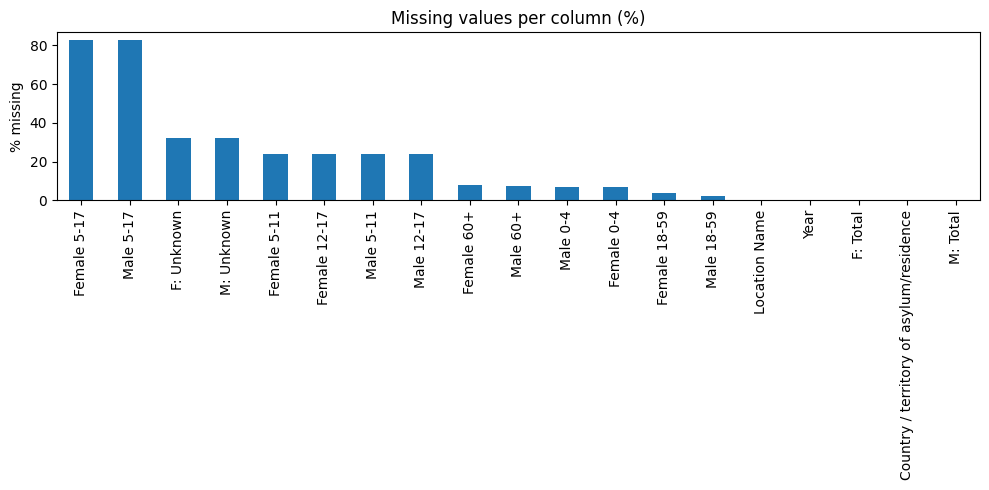

In [ ]:

print("Spaltennamen:")
print(demo.columns.tolist())

print("\nFehlende Werte (Anzahl):")
print(demo.isna().sum().sort_values(ascending=False).head(20))

# Anteil fehlender Werte in %
missing_percent = demo.isna().mean() * 100

plt.figure(figsize=(10,5))
missing_percent.sort_values(ascending=False).plot(kind="bar")
plt.title("Missing values per column (%)")
plt.ylabel("% missing")
plt.tight_layout()
plt.show()


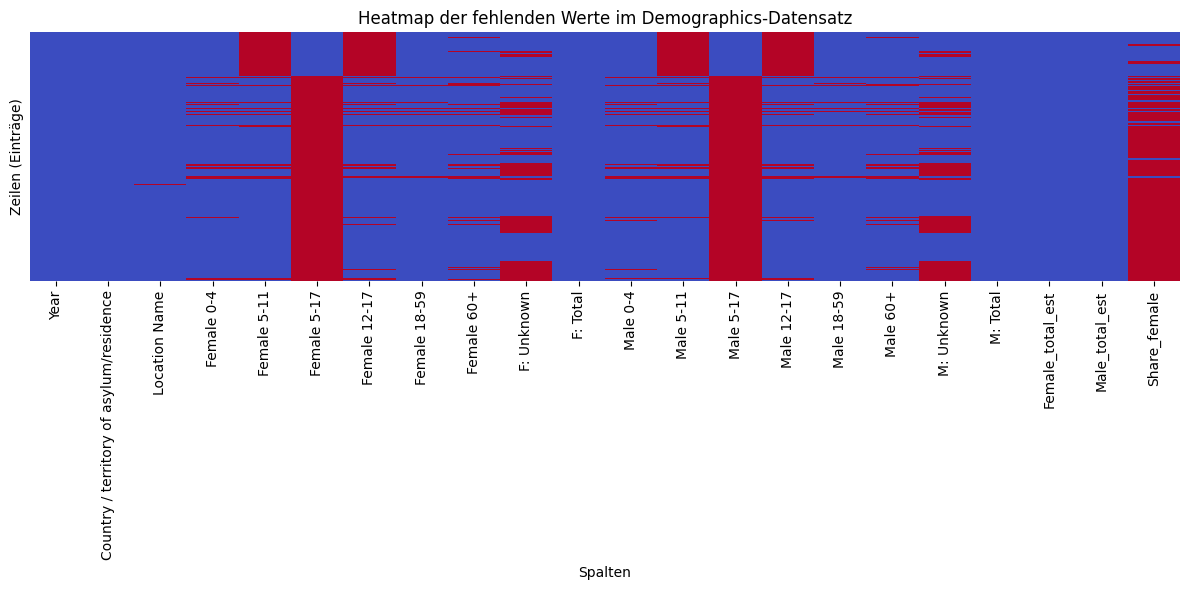

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Heatmap Missing Values
plt.figure(figsize=(12,6))
sns.heatmap(demo.isna(), cbar=False, cmap="coolwarm", yticklabels=False)
plt.title("Heatmap der fehlenden Werte im Demographics-Datensatz")
plt.xlabel("Spalten")
plt.ylabel("Zeilen (Einträge)")
plt.tight_layout()
plt.show()

## 3️ Grundlegende Statistiken zu Geschlecht und Alter

In [ ]:

# Nur numerische Spalten
num_cols = demo.select_dtypes(include=[np.number])
display(num_cols.describe())

# Spalten für weiblich / männlich erkennen
female_cols = [c for c in demo.columns if c.lower().startswith("female") or c.startswith("F:")]
male_cols   = [c for c in demo.columns if c.lower().startswith("male") or c.startswith("M:")]

# Summen bilden
demo["Female_total_est"] = demo[female_cols].sum(axis=1, skipna=True, numeric_only=True)
demo["Male_total_est"]   = demo[male_cols].sum(axis=1, skipna=True, numeric_only=True)
demo["Share_female"] = demo["Female_total_est"] / (demo["Female_total_est"] + demo["Male_total_est"])

print("\nDurchschnittlicher Frauenanteil:", round(demo["Share_female"].mean()*100,2), "%")
demo[["Year","Country / territory of asylum/residence","Location Name","Share_female"]].head(10)


,Year,Female 5-17,F: Unknown,Male 5-17,M: Unknown
count,18356.000000,3196.000000,1.249300e+04,3196.000000,1.250000e+04
mean,2010.314339,1449.903317,2.658836e+03,1536.136108,2.742023e+03
std,4.386318,11492.117177,5.783491e+04,12276.757111,6.055912e+04
min,2001.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,2007.000000,1.000000,0.000000e+00,1.000000,0.000000e+00
50%,2011.000000,38.000000,0.000000e+00,44.000000,0.000000e+00
75%,2014.000000,696.000000,0.000000e+00,724.000000,0.000000e+00
max,2016.000000,401884.000000,2.933164e+06,434058.000000,3.065738e+06



Durchschnittlicher Frauenanteil: 47.96 %


,Year,Country / territory of asylum/residence,Location Name,Share_female
0,2001,Afghanistan,Kabul,1.000000
1,2001,Afghanistan,Various,0.486412
2,2001,Afghanistan,Herat,NaN
3,2001,Angola,Viana,0.506303
4,2001,Angola,Moxico,0.507958
5,2001,Angola,Malange,0.471572
6,2001,Angola,Lunda Sul,0.478070
7,2001,Angola,Lunda Norte,0.431579
8,2001,Angola,Luanda,0.472222
9,2001,Angola,Kwanza Sul,0.488372


## 4️ Zeitverlauf: Frauenanteil pro Jahr

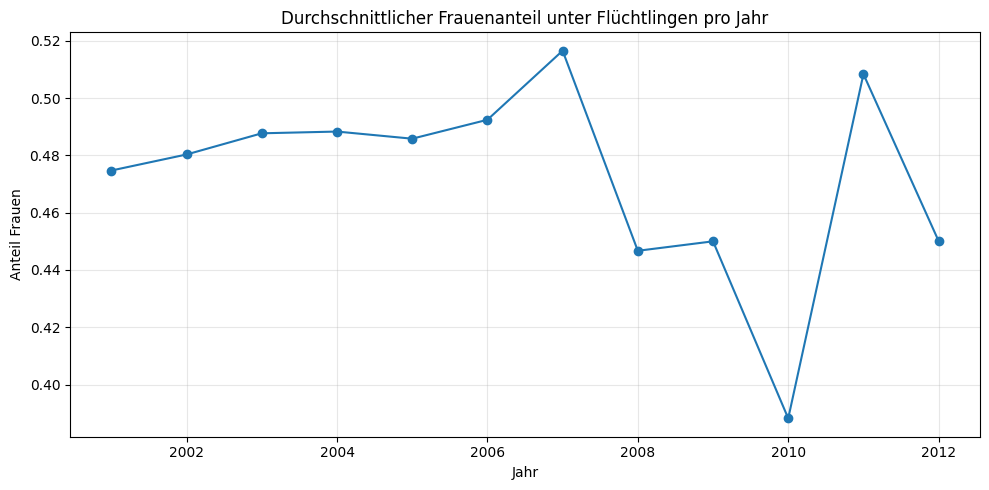

In [ ]:

share_year = (
    demo.groupby("Year", dropna=True)["Share_female"]
    .mean()
    .dropna()
    .reset_index()
)

plt.figure(figsize=(10,5))
plt.plot(share_year["Year"], share_year["Share_female"], marker="o")
plt.title("Durchschnittlicher Frauenanteil unter Flüchtlingen pro Jahr")
plt.xlabel("Jahr")
plt.ylabel("Anteil Frauen")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 5️ Altersstruktur (aggregiert über alle Jahre und Länder)

Gefundene Altersgruppen-Spalten: ['Female 0-4', 'Female 5-11', 'Female 12-17', 'Female 18-59', 'Female 60+', 'Male 0-4', 'Male 5-11', 'Male 12-17', 'Male 18-59', 'Male 60+']

Summen pro Altersgruppe:
Female 0-4      14207776.0
Female 5-11     18703611.0
Female 12-17    12848626.0
Female 18-59    47554464.0
Female 60+       4977493.0
Male 0-4        14647839.0
Male 5-11       19332750.0
Male 12-17      14041122.0
Male 18-59      49722824.0
Male 60+         4746139.0
dtype: float64


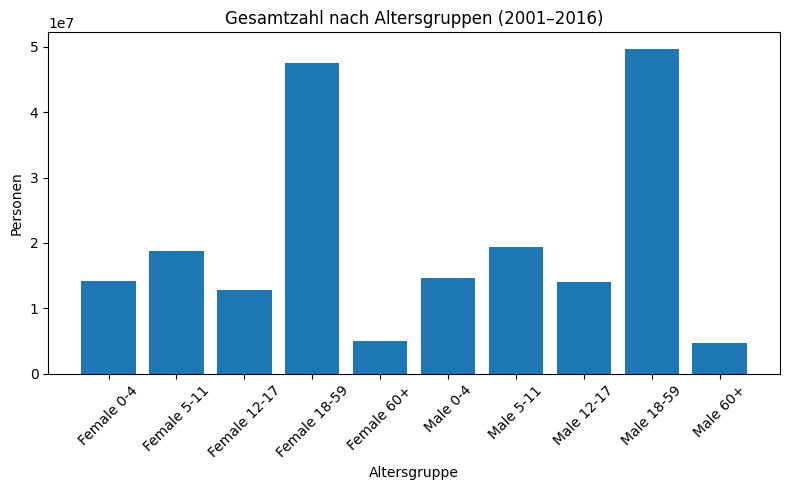

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Altersgruppen-Spalten finden
age_cols = [c for c in demo.columns if any(x in c for x in ["0-4","5-11","12-17","18-59","60+"])]
print("Gefundene Altersgruppen-Spalten:", age_cols)

# Nur numerische Werte summieren
age_sums = demo[age_cols].apply(pd.to_numeric, errors="coerce").sum()

# Ergebnis prüfen
print("\nSummen pro Altersgruppe:")
print(age_sums)

# Balkendiagramm
plt.figure(figsize=(8,5))
plt.bar(age_sums.index, age_sums.values)
plt.title("Gesamtzahl nach Altersgruppen (2001–2016)")
plt.xlabel("Altersgruppe")
plt.ylabel("Personen")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
